In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Input dataset

In [20]:
df = pd.read_csv('data.csv')

# Menampilkan 5 data teratas

In [21]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


# Menampilkan dataset yang kosong

In [22]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


# Menghapus data yang kosong

In [23]:
df.dropna(subset=['Satisfaction Level'], inplace=True)

# Melakukan standarisasi pada dataset

In [24]:
numeric_cols = df.select_dtypes(include=['number']).columns

scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Melakukan label encoding pada dataset

In [25]:
encoder = LabelEncoder()

kategorical_cols = df.select_dtypes(include=['object', 'boolean']).columns

for col in kategorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [26]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,-1.728843,0,-0.939761,4,1,0.754230,0.330381,0.996757,1,-0.120022,1
1,-1.718957,1,0.086720,2,2,-0.186319,-0.394236,0.132172,0,-0.640260,0
2,-1.709072,0,1.934386,0,0,-0.933192,-0.877314,-1.078247,1,1.143413,2
3,-1.699187,1,-0.734465,5,1,1.751261,1.538076,1.169674,0,-1.086179,1
4,-1.689301,1,-1.350354,3,2,-0.352721,0.088842,-0.040745,1,2.109570,2


# Split data

In [27]:
X = df.drop("Satisfaction Level", axis=1)
y = df["Satisfaction Level"]

In [28]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Membuat model sequential

In [29]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Melakukan kompilasi pada model

In [30]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Melatih model

In [31]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4607 - loss: 1.0703 - val_accuracy: 0.8857 - val_loss: 0.6883
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8180 - loss: 0.6538 - val_accuracy: 0.9429 - val_loss: 0.4315
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9495 - loss: 0.4258 - val_accuracy: 0.9714 - val_loss: 0.2793
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9799 - loss: 0.2801 - val_accuracy: 0.9714 - val_loss: 0.1926
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9728 - loss: 0.1950 - val_accuracy: 0.9714 - val_loss: 0.1369
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9835 - loss: 0.1298 - val_accuracy: 0.9714 - val_loss: 0.1083
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9711 - loss: 0.1358 - val_accuracy: 0.9714 - val_loss: 0.0868
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9789 - loss: 0.0918 - val_accuracy: 0.9714 - val_l

# Evaluasi hasil
Model berhasil melampaui target yang ditetapkan dengan hasil yang sempurna.

- Akurasi Training: 100.00%
- Akurasi Validation: 100.00%

Model deep learning yang dibangun berhasil mencapai akurasi 100% pada data training dan validasi. Hasil ini menunjukkan bahwa model sangat efektif dalam mempelajari pola dari fitur yang ada untuk memprediksi tingkat kepuasan pelanggan dengan sangat akurat.

In [33]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)

print(f"Akurasi Training: {train_acc*100:.2f}%")
print(f"Akurasi Validation: {val_acc*100:.2f}%")

Akurasi Training: 100.00%
Akurasi Validation: 100.00%


# Visualisasi hasil
Hasil visualisasi:
- Kenaikan Cepat: Akurasi model (baik training maupun validasi) meningkat secara drastis pada beberapa epoch pertama.

- Stabilitas: Setelah sekitar 5 epoch, kedua kurva akurasi mencapai nilai mendekati 1.0 (100%) dan tetap stabil hingga akhir pelatihan.

- Tidak Ada Overfitting: Kurva Training Accuracy (biru) dan Validation Accuracy (oranye) bergerak sangat berdekatan. Hal ini menunjukkan bahwa model memiliki kemampuan generalisasi yang sangat baik dan tidak mengalami overfitting.

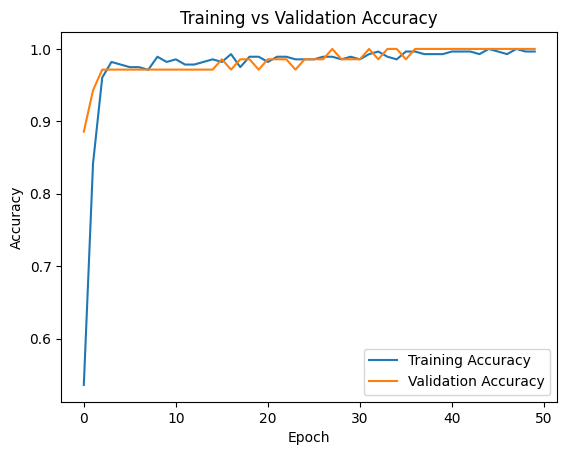

In [34]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()